# Exploratory data analysis - most common words

The goal of this exercise is to get a good understanding of the text - to see if what we're looking at makes sense. We will find the most common words and create word clouds


In [1]:
# Read in the document-term matrix
import pandas as pd

title30 = pd.read_pickle('data/title30_dtm.pkl')
title30.head()

,aba,abbott,abcs,abdominal,abdullah,abhh,ability,abiraterone,abnormal,abnormalities,...,ринку,сell,субєктів,та,умовах,универсальной,физиотерапия,формирования,эпидемии,эпидемического
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#title30.iloc[0]
top20=title30.sum(axis=0).sort_values(ascending=False).head(20)
top_dict = pd.DataFrame(top20.index, top20.values)

In [3]:
top_dict

,0
843,pandemic
431,coronavirus
418,patients
410,review
381,disease
283,health
244,infection
244,study
222,treatment
206,impact


Text(0.5, 1.0, 'Most Common Words')

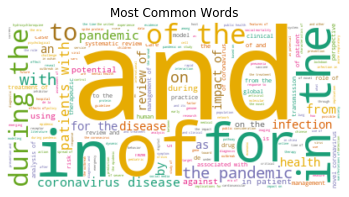

In [38]:
# Let's make some word clouds!
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# concatenate all strings from the pandas series
text = ''
clean_data2 = pd.read_pickle('data/title30_clean_data2.pkl')
clean_data3=clean_data2.str.cat()

# first try without filtering any words
stop_words=['']
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wc.generate(clean_data3)
    
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words")

There are a couple of issues here:
1. high frequency words (meaningless) dominates the word cloud
2. multiple variety of the same root of the words.

## Text pre-processing - data cleaning part 2

* Tokenize text
* Remove stop words
* Stemming / lemmatization
* Create bi-grams or tri-grams
* Deal with typos
* And more...

Tokenize text means broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

Text(0.5, 1.0, 'Most Common Words')

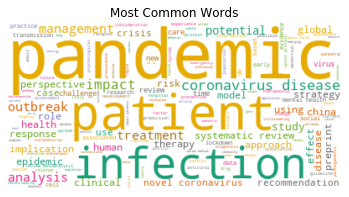

In [62]:
# Before creating the word clouds, we got to remove the most frequenct words
from nltk.corpus import stopwords;
import nltk;
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text 

#new_stopwords =['pandemic','the','with','of','patient','disease','coronavirus','health','review','impact','infection']
new_stopwords = [' ']
new_stopwords += stopwords.words('english')
#The WordNet lemmatizer removes affixes only if the resulting word is in its dictionary.
wordnet_lemmatizer = WordNetLemmatizer()
words_in_title=[]
for ii in range(len(clean_data2)):
    #tokenize data, lowercase text
    words = [wordnet_lemmatizer.lemmatize(wd, pos="n") for wd in clean_data2.iloc[ii].split() if wd not in new_stopwords]
    words_in_title += words
clean_data4=' '.join(words_in_title)

#stop_words = text.ENGLISH_STOP_WORDS.union(new_stopwords)
wc = WordCloud(stopwords=new_stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wc.generate(clean_data4)
    
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words")

## Further exercises

It would be interesting to find the most common words from abstracts whose reference count is over 30. Compare the most common words from title/abstract, whether we got the same results.

It would also be interesting to compare the most common words used by highly referenced paper (reference count >=30) and low reference paper(reference count <30).

